# Zadatak

Napraviti regresioni model koji na osnovu površine placa predvidja cenu kuće koristeći [data/housing.csv](data/housing.csv). Zatim napraviti funkcije za svaku od L.I.N.E. pretpostavki u fajlu [src/line_pretpostavke.py](src/line_pretpostavke.py):
**TODO 1**: Za svaki od narednih zadataka učitati [housing skup podataka](data/housing.csv), napraviti regresioni model koji na osnovu površine placa predvidja cenu kuće, i zatim:
1. Napraviti funkciju `def linear_assumption(model, features, labels):` tako da funkcija na x-osi crta pravu vrednost, a na y-osi prediktovanu vrednost. Prediktovane vrednosti dobija predikcijom modela `model` nad osobinama `features`.
1. Napraviti funkciju `def independence_of_errors_assumption(model, features, labels):` tako da funkcija crta prediktovane vrednost na x-osi, a na y-osi reziduale. Zatim testira nezavisnost grešaka *Durbin-Watson* testom.
1. Napraviti funkciju `def normality_of_errors_assumption(model, features, label, p_value_thresh=0.05):` tako da funkcija crta histogram reziduala. Zatim proverava normalnost grešaka *Anderson-Darling* testom.
1. Napraviti funkciju `def equal_variance_assumption(model, features, labels, p_value_thresh=0.05):` tako da funkcija crta prediktovane vrednost na x-osi, a na y-osi reziduale. Zatim testira jednaku varijansu *Goldfeld-Quandt* testom.

Zaključiti koje pretpostavke važe, a koje su narušene.
Sve prethodne funkcije proširiti parametrom `plot=True` koji odlučuje o tome da li će se prikazati grafik.

In [1]:
import seaborn as sb
import pandas as pd
import statsmodels.api as sm
sb.set(font_scale=1.)
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

import line_pretpostavke as line

## Učitavanje podataka

In [2]:
df = pd.read_csv('../data/housing.csv', sep=',')
x = df['lotsize(m^2)'].values.reshape(-1,1)
y = df['price']

## Generisanje modela

In [3]:
 # izračunaj nagib i presek za liniju koja se najbolja uklapa (best fit)

x_with_const = sm.add_constant(x)
model = sm.OLS(y, x_with_const).fit()

intercept, slope = model.params

# prediktuj y za svako x
y_pred = model.predict(x_with_const)

## Iscrtavanje modela

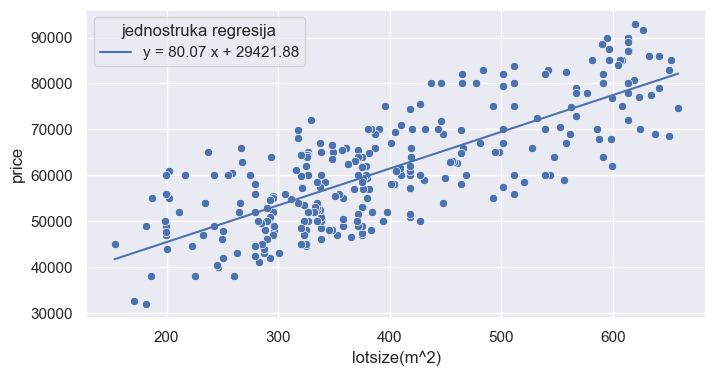

In [4]:
 # plotuj podatke i liniju koja se nabolje uklapa (best fit)
sb.scatterplot(data=df, x='lotsize(m^2)', y='price');
plt.plot(x, y_pred, 'b', label=f'y = {slope:.2f} x + {intercept:.2f}')
plt.legend(title='jednostruka regresija')
plt.show()

## Pretpostavka linearnosti

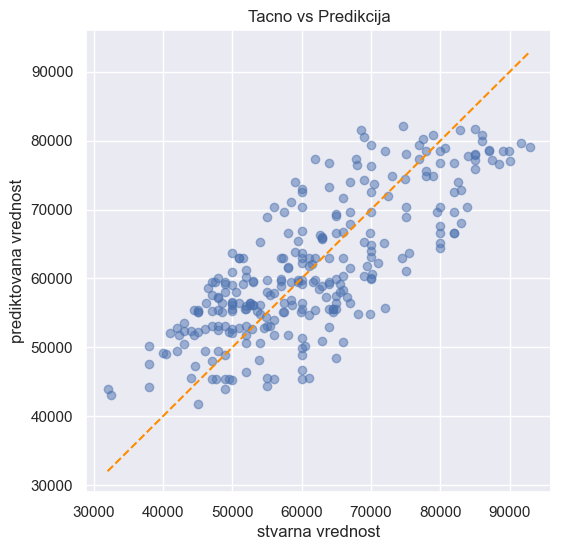

Linearnost važi za p vrednost:  1.798965885933914e-58


In [5]:
is_linear, p_value = line.linear_assumption(model, x_with_const, y)
print("Linearnost važi" if is_linear else "Linearnost NE važi", "za p vrednost: ", p_value)

Linearnost je zadovoljena. ✅

## Pretpostavka nezavisnosti grešaka

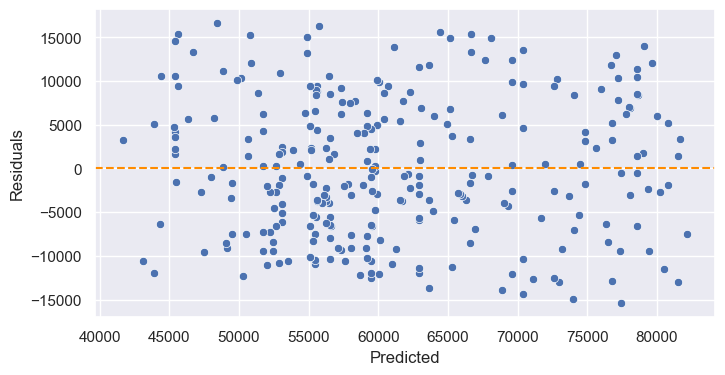

Durbin-Watson: 1.7798060672748415
Ne postoji autokorelacija


In [6]:
kol = line.independence_of_errors_assumption(model, x_with_const, y)
if kol == 0:
    print("Ne postoji autokorelacija")
elif kol > 0:
    print("Pozitivna autokorelacija")
else:
    print("Negativna autokorelacija")

Reziduali su ravnomerno rasporedjeni i Durbin-Watsonov test je pokazao da ne postoji autokorelacija podataka tako da pretpostavka važi. ✅

## Pretpostavka normalnosti grešaka

Distribucija nije normalna


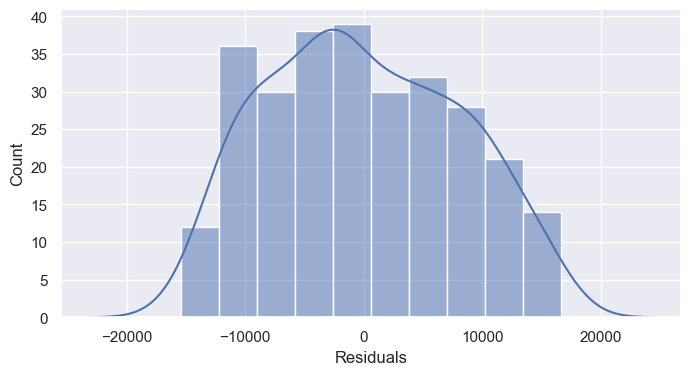

In [7]:
is_normal = line.normality_of_errors_assumption(model, x_with_const, y)

if is_normal:
    print("Distribucija je normalna")
else:
    print("Distribucija nije normalna")

Residuali nisu normalno raspoređeni pa pretpostavka ne važi. ❌

## Pretpostavka jednake varijanse

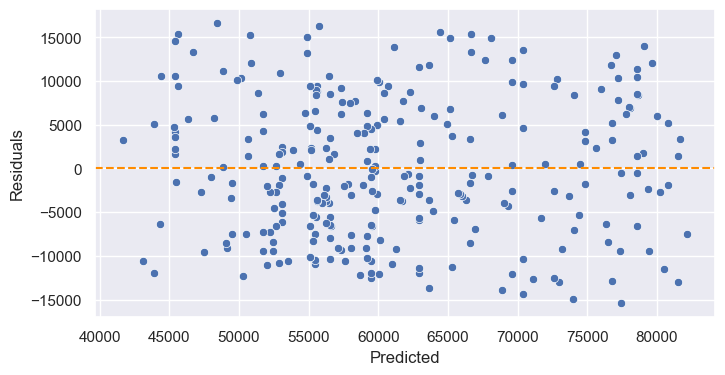

Varijanse su jednake


In [8]:
eq = line.equal_variance_assumption(model, x_with_const, y)

if eq:
    print("Varijanse su jednake")
else:
    print("Varijanse NISU jednake")

Varijanse su jednake pa pretpostavka važi. ✅

## Zaključak

1. Linearnost ✅
2. Nezavnisnost grešaka ✅
3. Normalnost grešaka ❌
4. Jednakost varijanse ✅

Samo pretpostavka normalnosti ne važi. Mada, s obzirom da imamo 280 zapisa u dataset-u, ova pretpostavka i nije toliko bitna, pa se može zaključiti da linearna regresija pogodan model za predikciju.